## Final Project Submission

Please fill out:
* Student name: Hiten Patel 
* Student pace: full time
* Scheduled project review date/time: September 14th: 11AM
* Instructor name: James Irving 
* Blog post URL:
https://hpatel530.github.io/blog_number_3_by_hiten_patel


In [208]:
# Your code here - remember to use markdown cells for comments as well!

# Introduction 

# OBTAIN
>**Importing libraies/packages**

In [361]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

>**Importing and previewing data**

In [362]:
#Import and previewing data 
df = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', None)
print (df.shape)
df.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [363]:
#Inspect data for duplicates
duplicates = df[df.duplicated()]
print(len(duplicates))

0


# SCRUB


## Inspecting the Columns 

>**Inspecting the Column's Data Type**

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

>**Inspecting Column's Unique Values**

In [365]:
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

>**Checking for Null Values** 

In [366]:
nulls = df.isna().sum()
null_percent = nulls[nulls>0] / len(df)
null_percent.to_frame('% Null').style.background_gradient(cmap='Reds')

,% Null
waterfront,0.110015
view,0.002917
yr_renovated,0.177895


>**Replace Null Values in 'waterfront, 'view' and 'yr_renovated'**

In [367]:
#Inspecting 'waterfront' column and replacing Null values with the median value 
print(df['waterfront'].nunique())
print(df['waterfront'].unique())
print(df['waterfront'].value_counts())

df['waterfront'] = df['waterfront'].fillna(df['waterfront'].median())

2
[nan  0.  1.]
0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [368]:
#Inspecting 'views' column and replacing Null values with the median value 
print(df['view'].nunique())
print(df['view'].unique())
print(df['view'].value_counts())

df['view'] = df['view'].fillna(df['view'].median())

5
[ 0. nan  3.  4.  2.  1.]
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [369]:
#Inspecting 'yr_renovated' column and replacing Null values with the median value 
print(df['yr_renovated'].nunique())
print(df['yr_renovated'].unique())
print(df['yr_renovated'].value_counts())

df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_renovated'].median())

70
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [370]:
#Confirm Changes to dataset
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

>**Replacing '?' in 'sqft_basement'**

In [371]:
df.sqft_basement = df.sqft_basement.map(lambda x: x.replace('?', "0"))


In [372]:
#Confirm changes 
print(df['sqft_basement'].value_counts())

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
2850.0        1
2580.0        1
516.0         1
176.0         1
207.0         1
Name: sqft_basement, Length: 304, dtype: int64


**Converting data types to respective columns and then completing a final check**

## Visually Examining Features vs Price

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdebe2873c8>,
      dtype=object)

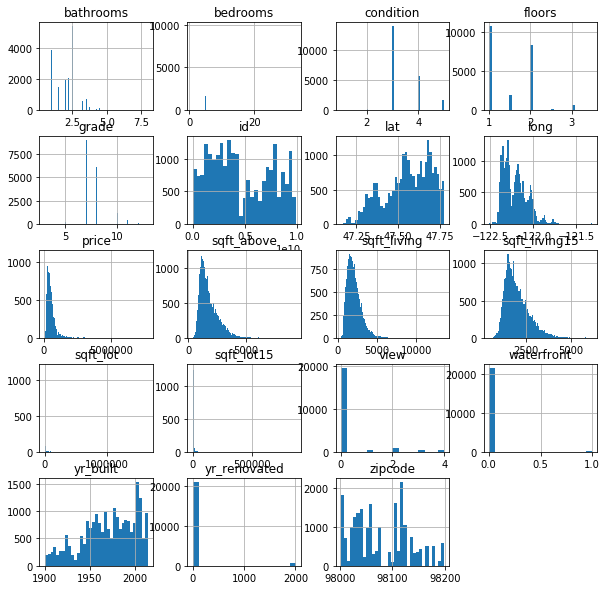

In [373]:
df.hist(bins='auto', figsize=(10,10))

In [374]:
def joint_plots(df, col, target='price'):
    plots = sns.jointplot(data=df, x=col, y=target, kind='reg')
    plt.suptitle(f'{col} vs {target}')
    return plots

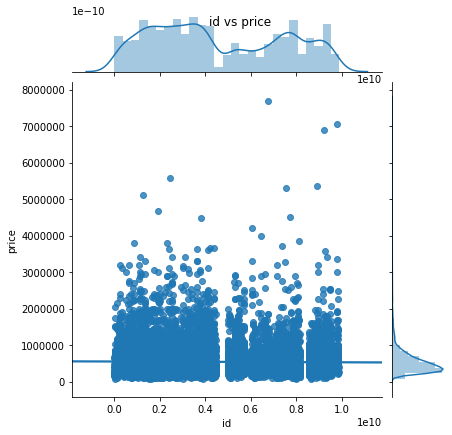

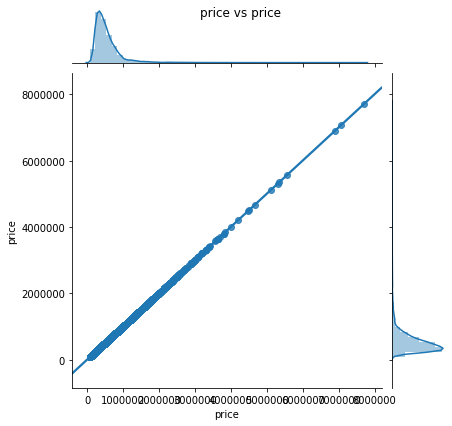

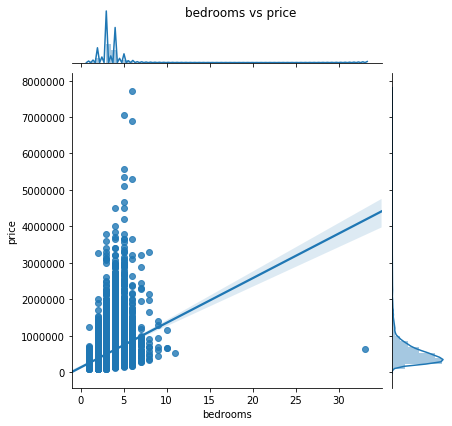

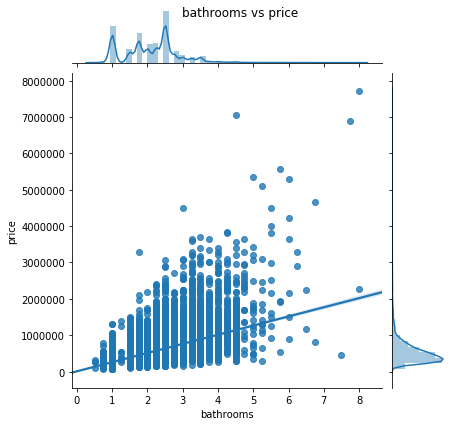

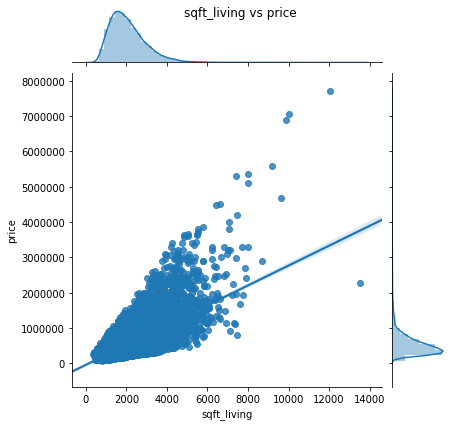

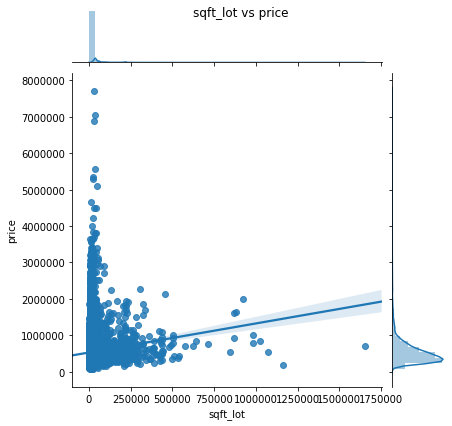

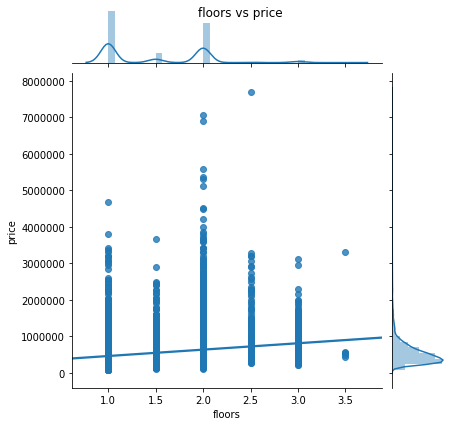

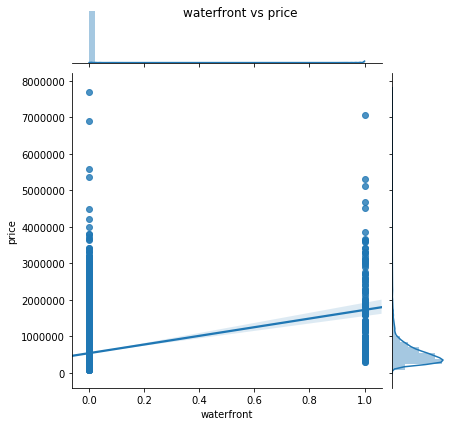

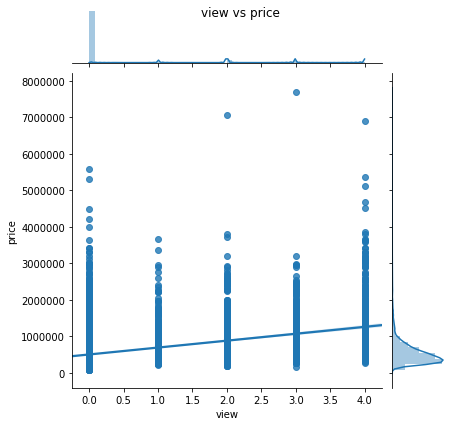

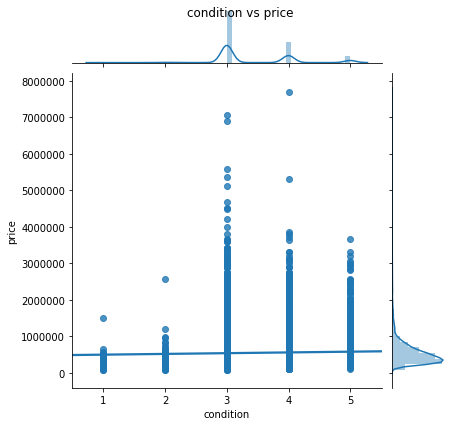

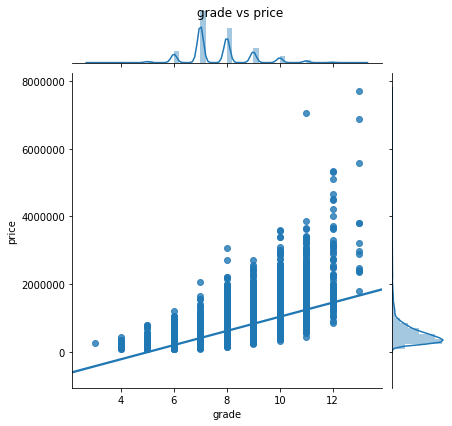

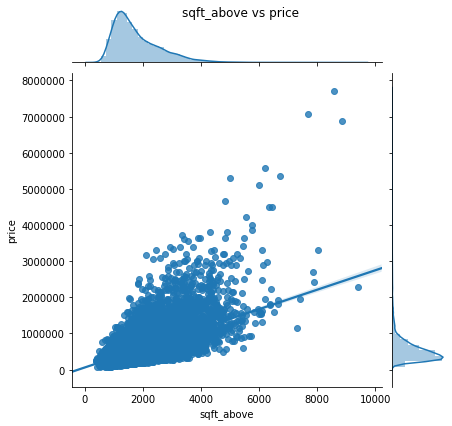

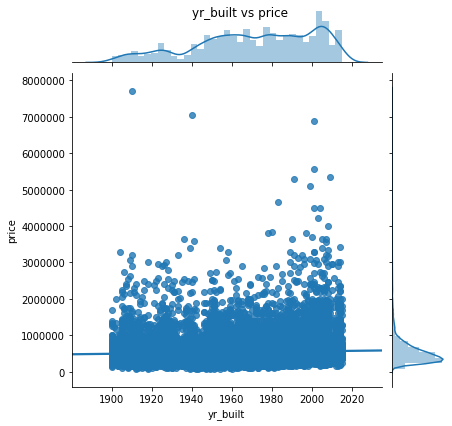

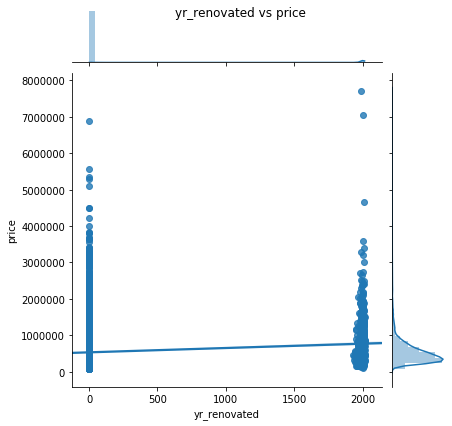

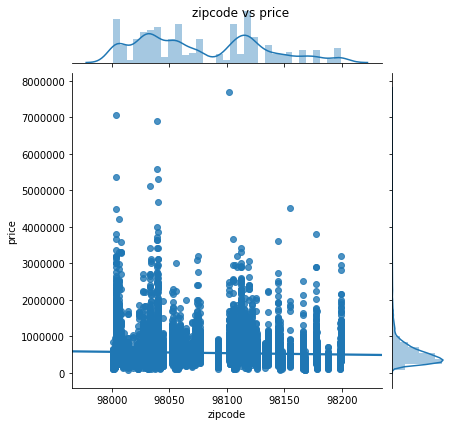

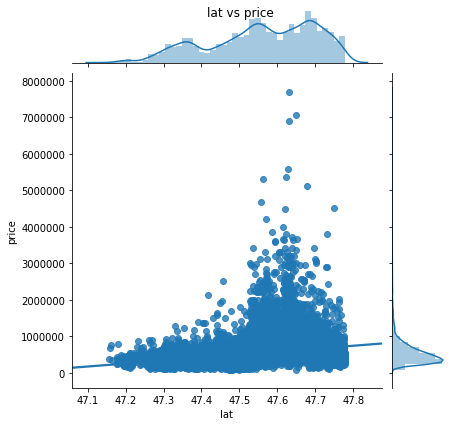

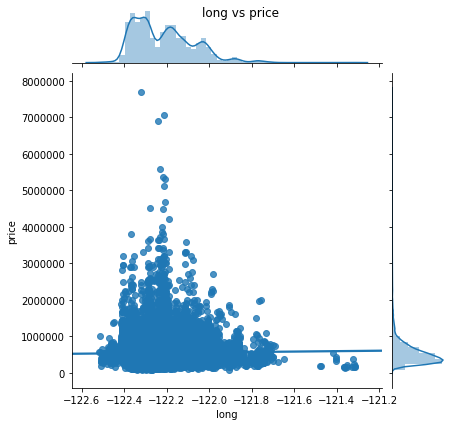

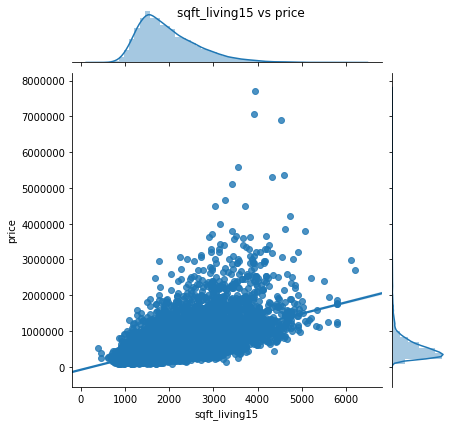

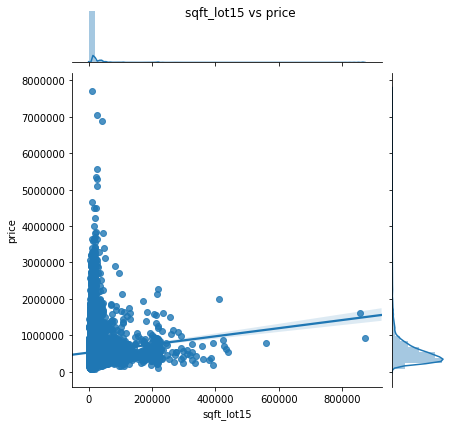

In [223]:
num_cols = list(df.select_dtypes('number').columns)
for col in num_cols: 
    joint_plots(df, col)

>* bedrooms has a linear relationship, and vertical stacking - categorical data

>* bathrooms has a linear relationship, and vertical stacking - categorical data

>* sqft_living has a linear relationship, contains outliers, skewed right

>* sqft_lot has a slight linear relationship,contains outliers, skewed right

>* floors slight linear relationship, and vertical stacking - categorical data

>* waterfront slight linear relationship, and vertical stacking - categorical data

>* view slight linear relationship, and vertical stacking - categorical data

>* condition has no linear relationship - vertical stacking - categorical data 

>* grade slight linear relationship, and vertical stacking - categorical data

>* sqft_above has a linear relationship, contains outliers, skewed right

>* yr_built slight linear relationship - possible categorical variables  

>* yr_renovated slight linear relationship - vertical stacking - categorical data 

>* zipcode no linear relationship, vertical stacking - possible categorical variable 

>* lat very little linear relationship
* long has no linear relationship 

>* sqft_living15 has a linear relationship, contains outliers, skewed right

>* sqft_lot15 slight linear relationship, contains outliers, skewed right

## Multicolinearity Analysis 

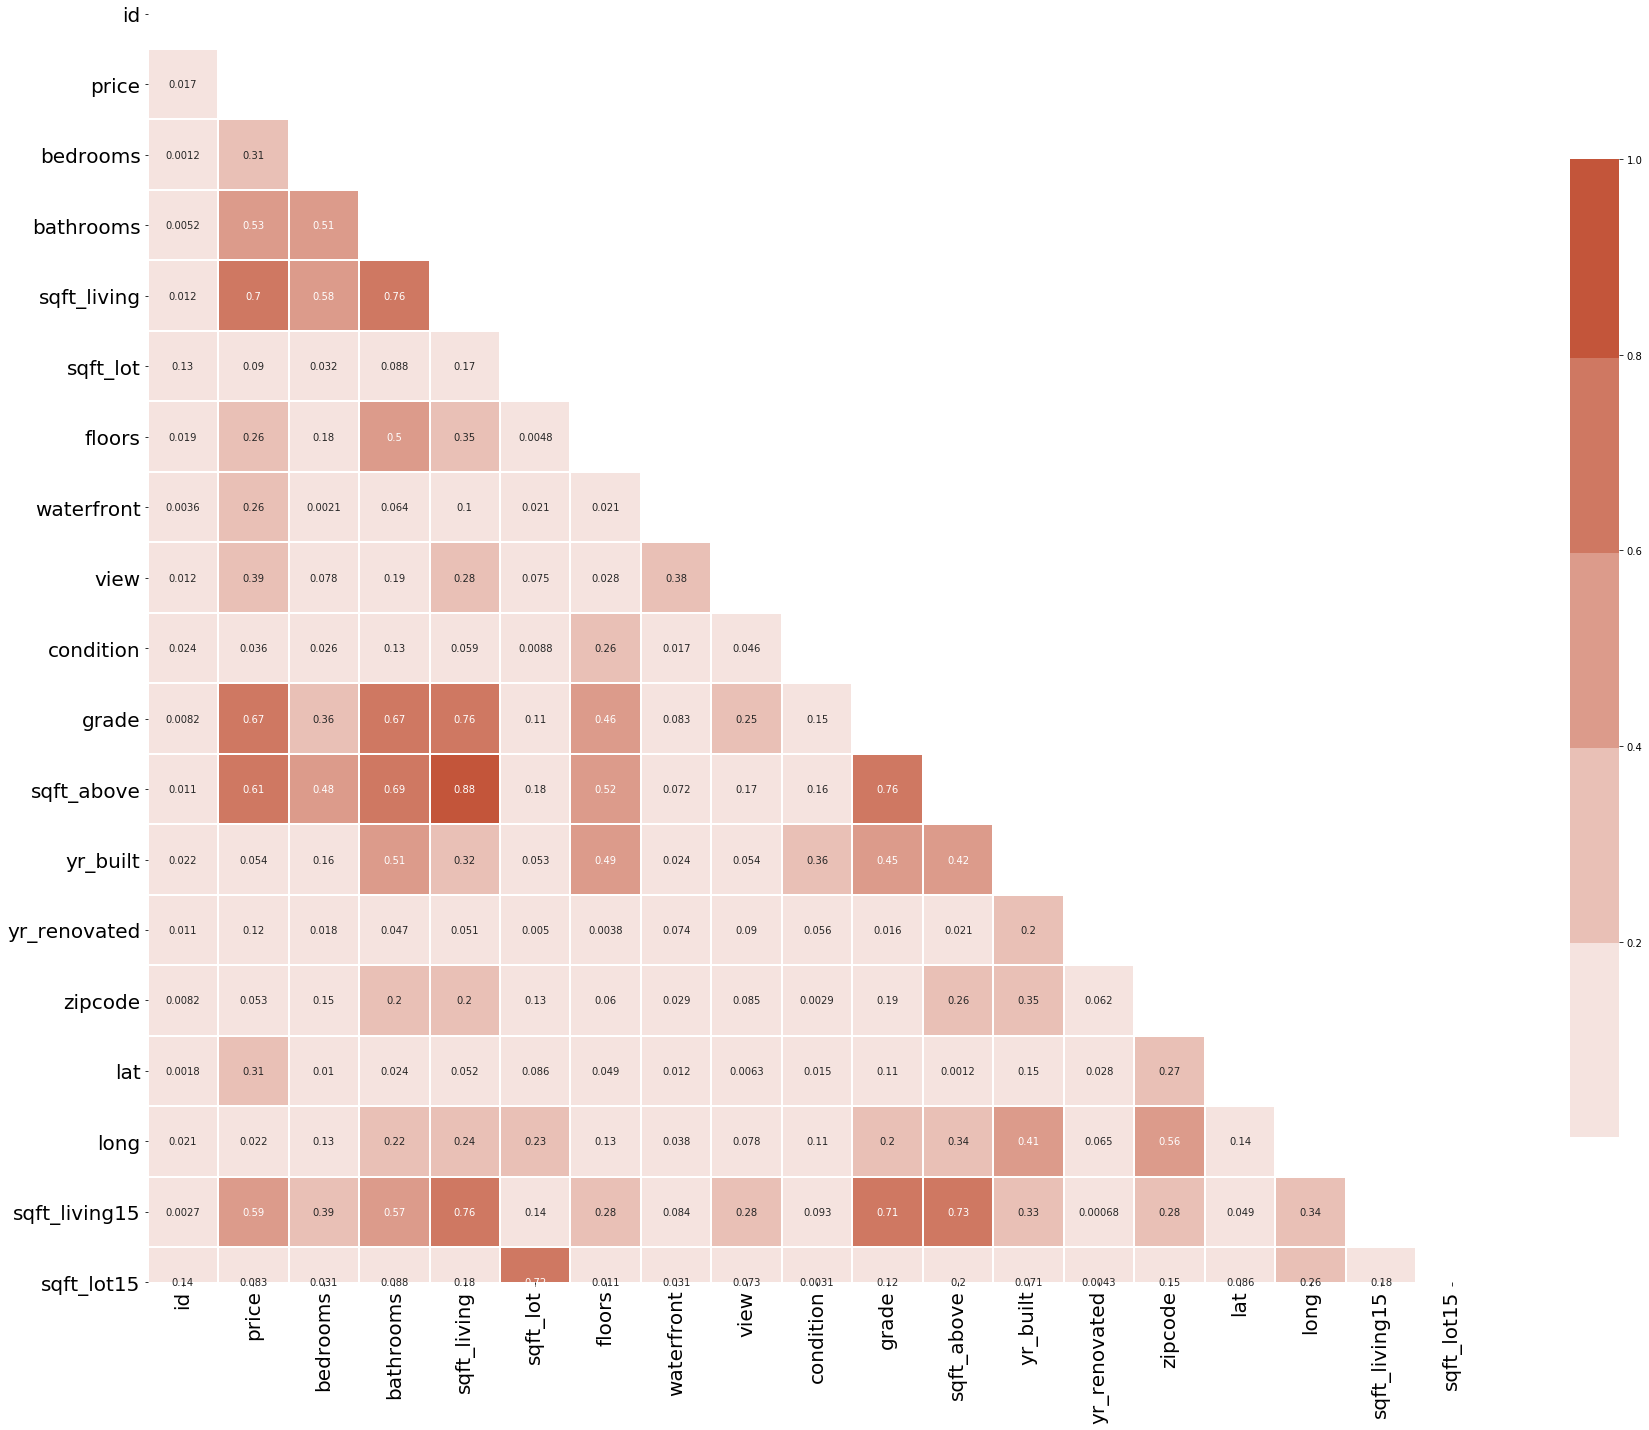

In [375]:
#Checking Multicolinearity 

plt.figure(figsize=(30,30))
plt.xticks(size=20)
plt.yticks(size=20)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask,k=0)] = True
sns.heatmap(df.corr().abs(),mask=mask,cmap=sns.diverging_palette(220, 20, n=10),
            annot=True,center=0,linewidths=1,
            square=True, cbar_kws={'shrink':0.6})

In [376]:
def color_red(val):
    color = 'red' if val > .75 else 'black'
    return 'color: %s' % color 


In [377]:
df.corr().abs().style.applymap(color_red)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.016772,0.001150,0.005162,0.012241,0.131911,0.018608,0.003599,0.011772,0.023803,0.008188,0.010799,0.021617,0.010612,0.008211,0.001798,0.020672,0.002701,0.138557
price,0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.053953,0.117855,0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.002127,0.078354,0.026496,0.356563,0.479386,0.155670,0.017900,0.154092,0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,0.126479,0.665838,0.686668,0.507173,0.047177,0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,0.059445,0.762779,0.876448,0.318152,0.051060,0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,0.004814,0.021459,0.075054,0.008830,0.114731,0.184139,0.052946,0.004979,0.129586,0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,0.004814,1.000000,0.020797,0.028414,0.264075,0.458794,0.523989,0.489193,0.003793,0.059541,0.049239,0.125943,0.280102,0.010722
waterfront,0.003599,0.264306,0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.024487,0.073939,0.028923,0.012157,0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.054452,0.090339,0.085059,0.006321,0.077702,0.278928,0.073083
condition,0.023803,0.036056,0.026496,0.126479,0.059445,0.008830,0.264075,0.016648,0.045622,1.000000,0.146896,0.158904,0.361592,0.055808,0.002888,0.015102,0.105877,0.093072,0.003126


## Converting Datatypes

In [378]:
#Converting datatypes to appropriate date type
#converting categorical data to str/object

df['bedrooms'] = df['bedrooms'].astype('str')
df['bathrooms'] = df['bathrooms'].astype('str')
df['floors'] = df['floors'].astype('str')
df['waterfront'] = df['waterfront'].astype('str')

df['view'] = df['view'].map(lambda x: 1 if x > 0 else 0)
df['view'] = df['view'].astype('str')

df['yr_renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df['yr_renovated'] = df['yr_renovated'].astype('str')

df['condition'] = df['condition'].astype('str')
df['grade'] = df['grade'].astype('str')

df['zipcode'] = df['zipcode'].astype('str')

#converting continuous data to int

df['price'] = df['price'].astype('int')

#converting data from object>int, then converting value to a categorical data
df['sqft_basement'] = df['sqft_basement'].astype('float')
df['sqft_basement'] = df['sqft_basement'].astype('int')
df.sqft_basement = df.sqft_basement.map(lambda x: 1 if x > 0 else 0)
df['sqft_basement'] = df['sqft_basement'].astype('str')                                      

In [379]:
#Adding a column for age of house 
df['Age'] = 2020 - df['yr_built']

In [380]:
#Dropping the following columns 

#No linear relationship 
df.drop('lat', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)

#Too many unique values 
df.drop('date', axis=1, inplace=True)

#Created a column 'Age' as a replacement
df.drop('yr_built', axis=1, inplace=True )

#Irrevalent column 
df.drop('id', axis=1, inplace=True)

In [381]:
#confirming changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          21597 non-null  int64 
 1   bedrooms       21597 non-null  object
 2   bathrooms      21597 non-null  object
 3   sqft_living    21597 non-null  int64 
 4   sqft_lot       21597 non-null  int64 
 5   floors         21597 non-null  object
 6   waterfront     21597 non-null  object
 7   view           21597 non-null  object
 8   condition      21597 non-null  object
 9   grade          21597 non-null  object
 10  sqft_above     21597 non-null  int64 
 11  sqft_basement  21597 non-null  object
 12  yr_renovated   21597 non-null  object
 13  zipcode        21597 non-null  object
 14  sqft_living15  21597 non-null  int64 
 15  sqft_lot15     21597 non-null  int64 
 16  Age            21597 non-null  int64 
dtypes: int64(7), object(10)
memory usage: 2.8+ MB


# Explore Data

In [382]:
df.describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age
count,2.159700e+04,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,2080.321850,1.509941e+04,1788.596842,1986.620318,12758.283512,49.000324
std,3.673681e+05,918.106125,4.141264e+04,827.759761,685.230472,27274.441950,29.375234
min,7.800000e+04,370.000000,5.200000e+02,370.000000,399.000000,651.000000,5.000000
25%,3.220000e+05,1430.000000,5.040000e+03,1190.000000,1490.000000,5100.000000,23.000000
50%,4.500000e+05,1910.000000,7.618000e+03,1560.000000,1840.000000,7620.000000,45.000000
75%,6.450000e+05,2550.000000,1.068500e+04,2210.000000,2360.000000,10083.000000,69.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,6210.000000,871200.000000,120.000000


**Observations**

* Contains extreme outliers 
* 50% of the houses were built between 1950-1997
* Age of houses range from 5 years to 120

## Visually Inspecting Target Variable -'Prices'

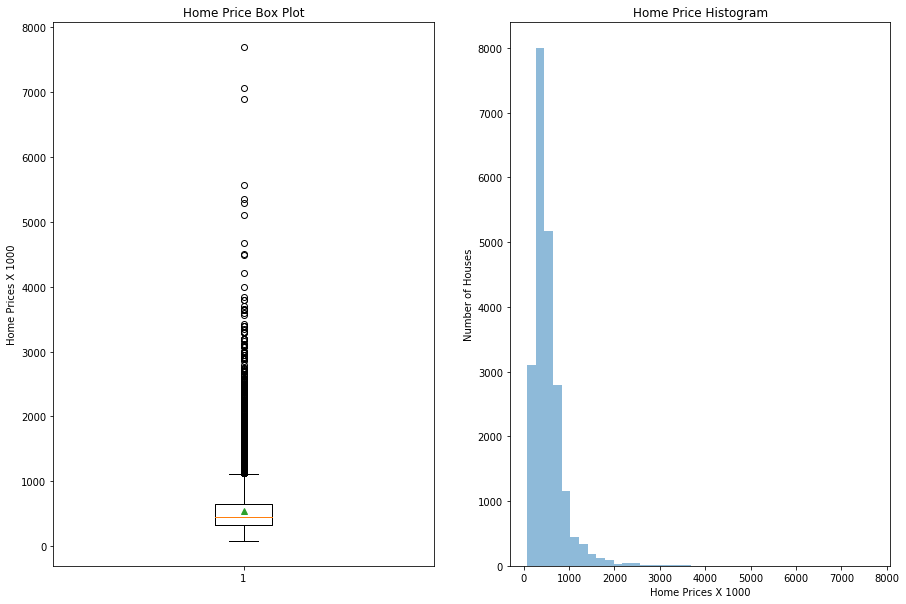

In [383]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax1.boxplot(df.price/1000, showmeans=True)
ax1.set_ylabel('Home Prices X 1000')
ax1.set_title('Home Price Box Plot')
ax2.hist(df.price/1000, bins=40, alpha=0.5)
ax2.set_ylabel('Number of Houses')
ax2.set_xlabel('Home Prices X 1000')
ax2.set_title('Home Price Histogram')
plt.show()

**Observations**

* Extreme outliers
* Positively skewed right 

## Check for Correlation and Multicollinearity

In [384]:
#Removing target value 'price' and checking correlation among feats
data_pred = df.iloc[:,2:]
data_pred.corr().abs().style.applymap(color_red)

,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age
sqft_living,1.000000,0.173453,0.876448,0.756402,0.184342,0.318152
sqft_lot,0.173453,1.000000,0.184139,0.144763,0.718204,0.052946
sqft_above,0.876448,0.184139,1.000000,0.731767,0.195077,0.424037
sqft_living15,0.756402,0.144763,0.731767,1.000000,0.183515,0.326377
sqft_lot15,0.184342,0.718204,0.195077,0.183515,1.000000,0.070777
Age,0.318152,0.052946,0.424037,0.326377,0.070777,1.000000


(7, -0.5)

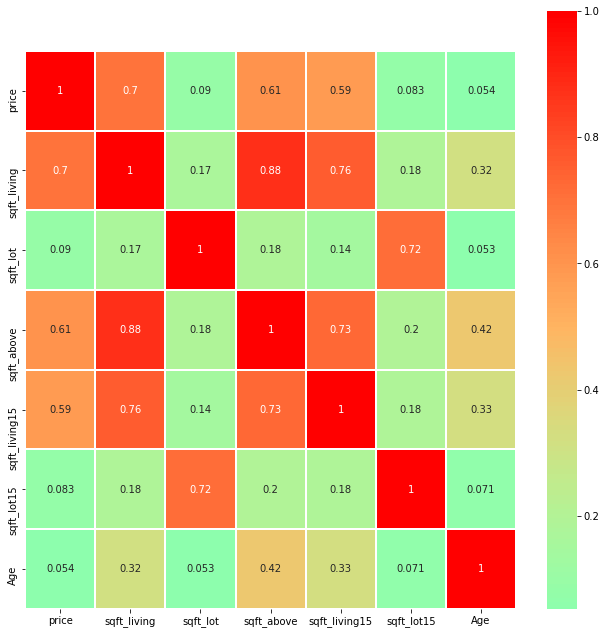

In [340]:
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(df.corr().abs(), center=0, annot=True, linewidths=1, cmap='rainbow');
ax.set_ylim(len(df.corr())-0, -0.5)

>Observations:
* Price and 'sqft_living have a the strongest correlation.
* 'Sqft_living' has a strong correlation with 'sqft_above' and 'sqft_living15' which is indicated by a .75 or higher
* 'Sqft_lot and 'sqft_lot15 have a .72 correlation. 
* 'Sqft-above and 'sqft_living have a .73 correlation.


### Model 1: 

In [385]:
outcome = 'price'
df.columns = [col.replace('.', '_') for col in df.columns]
x_cols = list(df.columns)
x_cols.remove(outcome)
x_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'Age']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     815.8
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:20:30   Log-Likelihood:            -2.8767e+05
No. Observations:               21597   AIC:                         5.756e+05
Df Residuals:                   21459   BIC:                         5.767e+05
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.209e+04   8.08e+04      0.273      0.785   -1.36e+05     1.8e+05
bedrooms[T.10]     -3.247e+05   8.76e+04     -3.707      0.000   -4.96e+05   -1.53e+05
bedrooms[T.11]     -6.077e+04   1.49e+05     -0.408      0.683   -3.53e+05    2.31e+05
bedrooms[T.2]       6308.3016   1.14e+04      0.553      0.580    -1.6e+04    2.87e+04
bedrooms[T.3]       1.516e+04   1.14e+04      1.325      0.185   -7264.296    3.76e+04
bedrooms[T.33]      4.605e+04   1.49e+05      0.310      0.757   -2.45e+05    3.37e+05
bedrooms[T.4]       -786.6642   1.17e+04     -0.067      0.946   -2.37e+04    2.21e+04
bedrooms[T.5]       -1.57e+04   1.23e+04     -1.274      0.203   -3.98e+04    8446.035
bedrooms[T.6]      -4.761e+04    1.5e+04     -3.174      0.002    -7.7e+04   -1.82e+04
bedrooms[T.7]      -1.872e+05   2.75e+04     -6.813      0.000   -2.41e+05   -1.33e+05
bedrooms[T.8]      -5.873e+04   4.35e+04     -1.349      0.177   -1.44e+05    2.66e+04
bedrooms[T.9]       -1.69e+05   6.81e+04     -2.480      0.013   -3.03e+05   -3.54e+04
bathrooms[T.0.75]  -7019.0629   7.64e+04     -0.092      0.927   -1.57e+05    1.43e+05
bathrooms[T.1.0]    2.978e+04   7.42e+04      0.402      0.688   -1.16e+05    1.75e+05
bathrooms[T.1.25]  -5.644e+04   8.91e+04     -0.633      0.527   -2.31e+05    1.18e+05
bathrooms[T.1.5]     2.26e+04   7.43e+04      0.304      0.761   -1.23e+05    1.68e+05
bathrooms[T.1.75]   1.961e+04   7.42e+04      0.264      0.792   -1.26e+05    1.65e+05
bathrooms[T.2.0]    1.982e+04   7.42e+04      0.267      0.790   -1.26e+05    1.65e+05
bathrooms[T.2.25]   3.901e+04   7.43e+04      0.525      0.599   -1.07e+05    1.85e+05
bathrooms[T.2.5]    2.803e+04   7.42e+04      0.378      0.706   -1.17e+05    1.74e+05
bathrooms[T.2.75]   2.845e+04   7.43e+04      0.383      0.702   -1.17e+05    1.74e+05
bathrooms[T.3.0]    4.573e+04   7.44e+04      0.615      0.539      -1e+05    1.92e+05
bathrooms[T.3.25]   8.919e+04   7.45e+04      1.197      0.231   -5.69e+04    2.35e+05
bathrooms[T.3.5]    4.744e+04   7.45e+04      0.637      0.524   -9.86e+04    1.93e+05
bathrooms[T.3.75]   1.311e+05   7.53e+04      1.741      0.082   -1.65e+04    2.79e+05
bathrooms[T.4.0]     1.32e+05   7.55e+04      1.750      0.080   -1.59e+04     2.8e+05
bathrooms[T.4.25]   2.119e+05   7.63e+04      2.777      0.005    6.23e+04    3.61e+05
bathrooms[T.4.5]    1.496e+05   7.59e+04      1.970      0.049     734.223    2.98e+05
bathrooms[T.4.75]   4.074e+05   8.08e+04      5.042      0.000    2.49e+05    5.66e+05
bathrooms[T.5.0]    2.821e+05   8.13e+04      3.468      0.001    1.23e+05    4.41e+05
bathrooms[T.5.25]   2.534e+05   8.55e+04      2.964      0.003    8.58e+04    4.21e+05
bathrooms[T.5.5]    4.191e+05   8.89e+04      4.714      0.000    2.45e+05    5.93e+05
bathrooms[T.5.75]   3.161e+05   1.07e+

[Text(0, 0.5, 'Residuals'),
 Text(0.5, 0, 'Target Values'),
 Text(0.5, 1.0, 'Homoscedasticity Check')]

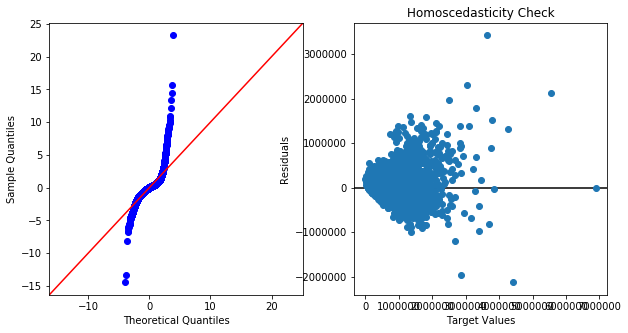

In [386]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
display(model.summary())
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
fig = sm.graphics.qqplot(model.resid, stats.distributions.norm, fit=True, line='45', ax=ax[0])
ax[1].scatter(x=model.predict(), y=model.resid)
ax[1].axhline(0,color='k',zorder=-1)
ax[1].set(ylabel='Residuals',title='Homoscedasticity Check', xlabel="Target Values")

>Observations:
* The data has not been normalized and no outliers have been removed
* The first model yielded an R squared of .839
* The skew value of 2.383 suggests that the data distribution is highly skewed
* The kurtosis value of 42.8 indicates that the data distribution has heavy tails 
* The QQ plot shows that we do not have normally distributed residuals and the tails have extreme values. 
* Homoscedasticity test shows hetroscedasticities and does not pass

## Log Transformation on Continuous Data 


In [387]:
#Creating a variable pulling all numeric columns 

num_cols = df.select_dtypes('number').columns

#Creating a for loop and applying log transformation to each column 
for feat in num_cols: 
    df[feat] = df[feat].map(lambda x: np.log(x))

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,sqft_living15,sqft_lot15,Age
0,12.309982,3,1.0,7.073270,8.639411,1.0,0.0,0,3,7,7.073270,0,0,98178,7.200425,8.639411,4.174387
1,13.195614,3,2.25,7.851661,8.887653,2.0,0.0,0,3,7,7.682482,1,1,98125,7.432484,8.941022,4.234107
2,12.100712,2,1.0,6.646391,9.210340,1.0,0.0,0,3,6,6.646391,0,0,98028,7.908387,8.994917,4.465908
3,13.311329,4,3.0,7.580700,8.517193,1.0,0.0,0,5,7,6.956545,1,0,98136,7.215240,8.517193,4.007333
4,13.142166,3,2.0,7.426549,8.997147,1.0,0.0,0,3,8,7.426549,0,0,98074,7.495542,8.923058,3.496508


## One-Hot Encoding for Categorical Data

In [388]:
#Create variable that holds categorical data
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_basement', 'yr_renovated',
            'zipcode']

#Perform one-hot encoding on categorical data
dummies = pd.get_dummies(df[cat_cols], prefix=cat_cols, drop_first = True)

#Remove the orginal data from df
df_preprocessed = df.drop(cat_cols, axis=1)

#Concat df_pre with dummies 
df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

#Preview the results 
print(df_preprocessed.shape)
df_preprocessed.head()


(21597, 138)


,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1,condition_2,condition_3,condition_4,condition_5,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,sqft_basement_1,yr_renovated_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309982,7.073270,8.639411,7.073270,7.200425,8.639411,4.174387,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,13.195614,7.851661,8.887653,7.682482,7.432484,8.941022,4.234107,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12.100712,6.646391,9.210340,6.646391,7.908387,8.994917,4.465908,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13.311329,7.580700,8.517193,6.956545,7.215240,8.517193,4.007333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,13.142166,7.426549,8.997147,7.426549,7.495542,8.923058,3.496508,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# MODEL

In [389]:
# Create train-test dataset for model validation
train, test = train_test_split(df_preprocessed, test_size=0.2)

# Check datasets
print(train.shape, test.shape)

(17277, 138) (4320, 138)


>**Define Model Data**

In [392]:
#Clean the column names 

train.columns = [col.replace('.', '_') for col in train.columns]

#Define the Dependent Variable
outcome = 'price'

#Create the Columns List 
x_cols = list(train.columns)

#Remove the Dependent Variable 
x_cols.remove(outcome)

x_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'Age',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_33',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bathrooms_0_75',
 'bathrooms_1_0',
 'bathrooms_1_25',
 'bathrooms_1_5',
 'bathrooms_1_75',
 'bathrooms_2_0',
 'bathrooms_2_25',
 'bathrooms_2_5',
 'bathrooms_2_75',
 'bathrooms_3_0',
 'bathrooms_3_25',
 'bathrooms_3_5',
 'bathrooms_3_75',
 'bathrooms_4_0',
 'bathrooms_4_25',
 'bathrooms_4_5',
 'bathrooms_4_75',
 'bathrooms_5_0',
 'bathrooms_5_25',
 'bathrooms_5_5',
 'bathrooms_5_75',
 'bathrooms_6_0',
 'bathrooms_6_25',
 'bathrooms_6_5',
 'bathrooms_6_75',
 'bathrooms_7_5',
 'bathrooms_7_75',
 'bathrooms_8_0',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1_0',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_12',
 'grade_13',
 'grade_3',
 'grade_4

## Model 2 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     964.1
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:22:38   Log-Likelihood:                 5174.2
No. Observations:               17277   AIC:                        -1.007e+04
Df Residuals:                   17140   BIC:                            -9012.
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.4746      0.131     57.078      0.000       7.218       7.731
sqft_living         0.2550      0.014     17.910      0.000       0.227       0.283
sqft_lot            0.0822      0.004     19.923      0.000       0.074       0.090
sqft_above          0.1714      0.014     12.163      0.000       0.144       0.199
sqft_living15       0.1506      0.008     19.766      0.000       0.136       0.165
sqft_lot15         -0.0261      0.004     -5.810      0.000      -0.035      -0.017
Age                -0.0285      0.003     -8.418      0.000      -0.035      -0.022
bedrooms_10        -0.2600      0.107     -2.420      0.016      -0.471      -0.049
bedrooms_11         0.0866      0.182      0.477      0.633      -0.269       0.442
bedrooms_2         -0.0137      0.016     -0.861      0.389      -0.045       0.017
bedrooms_3         -0.0301      0.016     -1.879      0.060      -0.062       0.001
bedrooms_33         0.0472      0.181      0.261      0.794      -0.308       0.402
bedrooms_4         -0.0300      0.016     -1.825      0.068      -0.062       0.002
bedrooms_5         -0.0533      0.017     -3.083      0.002      -0.087      -0.019
bedrooms_6         -0.0833      0.021     -3.961      0.000      -0.125      -0.042
bedrooms_7         -0.1860      0.037     -5.020      0.000      -0.259      -0.113
bedrooms_8         -0.1034      0.058     -1.771      0.077      -0.218       0.011
bedrooms_9         -0.1083      0.084     -1.295      0.195      -0.272       0.056
bathrooms_0_75      0.2681      0.108      2.494      0.013       0.057       0.479
bathrooms_1_0       0.2490      0.104      2.386      0.017       0.044       0.454
bathrooms_1_25      0.1567      0.128      1.225      0.220      -0.094       0.407
bathrooms_1_5       0.2393      0.105      2.289      0.022       0.034       0.444
bathrooms_1_75      0.2580      0.105      2.468      0.014       0.053       0.463
bathrooms_2_0       0.2544      0.105      2.433      0.015       0.049       0.459
bathrooms_2_25      0.2731      0.105      2.610      0.009       0.068       0.478
bathrooms_2_5       0.2777      0.105      2.654      0.008       0.073       0.483
bathrooms_2_75      0.2900      0.105      2.769      0.006       0.085       0.495
bathrooms_3_0       0.2959      0.105      2.822      0.005       0.090       0.501
bathrooms_3_25      0.3152      0.105      3.002      0.003       0.109       0.521
bathrooms_3_5       0.3160      0.105      3.011      0.003       0.110       0.522
bathrooms_3_75      0.3545      0.106      3.347      0.001       0.147       0.562
bathrooms_4_0       0.3351      0.106      3.156      0.002       0.127       0.543
bathrooms_4_25      0.4097      0.107      3.822      0.000       0.200       0.620
bathrooms_4_5       0.3106      0.107      2.910      0.004

[Text(0, 0.5, 'Residuals'),
 Text(0.5, 0, 'Target Values'),
 Text(0.5, 1.0, 'Homoskedasticity Check')]

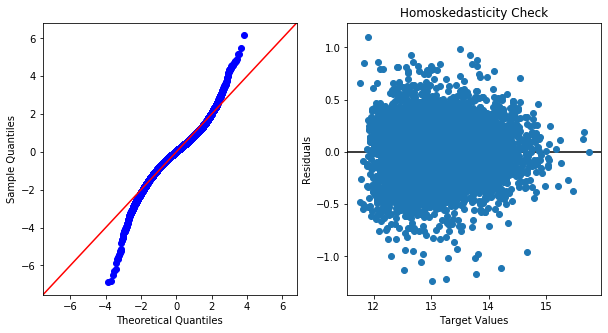

In [393]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
display(model.summary())
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
fig = sm.graphics.qqplot(model.resid, stats.distributions.norm, fit=True, line='45', ax=ax[0])
ax[1].scatter(x=model.predict(), y=model.resid)
ax[1].axhline(0,color='k',zorder=-1)
ax[1].set(ylabel='Residuals',title='Homoskedasticity Check', xlabel="Target Values")


>**Observations:**
*  For Model 2, numeric data has been log transformed and dummy variables have been created for categorical data. 
* The 2nd Model yielded an R squared of .884
* The Skew level of -.203 shows that the data is pretty symmetrical 
* The Kurtosis level of 5.890 is greater than 3 which is a  leptokurtic distribution. This type of distribution has longer and fatter tails. 

**Removing P-Values**

In [394]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

138 118
['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,7.4746,0.131,57.078,0.0,7.218,7.731
sqft_living,0.2550,0.014,17.910,0.0,0.227,0.283
sqft_lot,0.0822,0.004,19.923,0.0,0.074,0.090
sqft_above,0.1714,0.014,12.163,0.0,0.144,0.199
sqft_living15,0.1506,0.008,19.766,0.0,0.136,0.165


## Model 3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1119.
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:23:57   Log-Likelihood:                 5156.1
No. Observations:               17277   AIC:                        -1.008e+04
Df Residuals:                   17159   BIC:                            -9161.
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.6310      0.089     85.266      0.000       7.456       7.806
sqft_living         0.2480      0.014     17.946      0.000       0.221       0.275
sqft_lot            0.0826      0.004     20.088      0.000       0.075       0.091
sqft_above          0.1731      0.014     12.755      0.000       0.147       0.200
sqft_living15       0.1512      0.008     19.948      0.000       0.136       0.166
sqft_lot15         -0.0264      0.004     -5.878      0.000      -0.035      -0.018
Age                -0.0287      0.003     -8.602      0.000      -0.035      -0.022
bedrooms_10        -0.2280      0.106     -2.147      0.032      -0.436      -0.020
bedrooms_5         -0.0221      0.006     -3.901      0.000      -0.033      -0.011
bedrooms_6         -0.0511      0.013     -3.901      0.000      -0.077      -0.025
bedrooms_7         -0.1501      0.033     -4.569      0.000      -0.214      -0.086
bathrooms_0_75      0.1363      0.056      2.448      0.014       0.027       0.245
bathrooms_1_0       0.1095      0.049      2.229      0.026       0.013       0.206
bathrooms_1_5       0.0979      0.049      1.990      0.047       0.001       0.194
bathrooms_1_75      0.1148      0.049      2.341      0.019       0.019       0.211
bathrooms_2_0       0.1117      0.049      2.274      0.023       0.015       0.208
bathrooms_2_25      0.1296      0.049      2.641      0.008       0.033       0.226
bathrooms_2_5       0.1344      0.049      2.745      0.006       0.038       0.230
bathrooms_2_75      0.1465      0.049      2.978      0.003       0.050       0.243
bathrooms_3_0       0.1523      0.049      3.084      0.002       0.055       0.249
bathrooms_3_25      0.1708      0.050      3.451      0.001       0.074       0.268
bathrooms_3_5       0.1716      0.049      3.475      0.001       0.075       0.268
bathrooms_3_75      0.2097      0.051      4.089      0.000       0.109       0.310
bathrooms_4_0       0.1879      0.052      3.642      0.000       0.087       0.289
bathrooms_4_25      0.2664      0.054      4.965      0.000       0.161       0.372
bathrooms_4_5       0.1647      0.053      3.121      0.002       0.061       0.268
bathrooms_4_75      0.3207      0.065      4.961      0.000       0.194       0.447
bathrooms_5_0       0.2925      0.066      4.443      0.000       0.163       0.422
bathrooms_5_25      0.2129      0.076      2.799      0.005       0.064       0.362
bathrooms_5_5       0.3385      0.081      4.175      0.000       0.180       0.497
bathrooms_6_0       0.2753      0.103      2.664      0.008       0.073       0.478
bathrooms_6_25      0.5255      0.141      3.737      0.000       0.250       0.801
bathrooms_6_5       0.3356      0.137      2.447      0.014       0.067       0.604
bathrooms_7_5    3.974e-16   4.32e-16      0.921      0.357

[Text(0, 0.5, 'Residuals'),
 Text(0.5, 0, 'Target Values'),
 Text(0.5, 1.0, 'Homoskedasticity Check')]

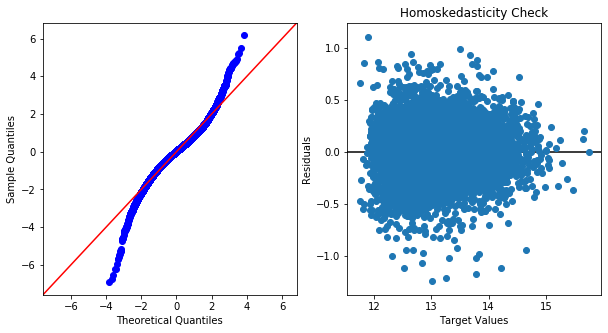

In [395]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
display(model.summary())
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
fig = sm.graphics.qqplot(model.resid, stats.distributions.norm, fit=True, line='45', ax=ax[0])
ax[1].scatter(x=model.predict(), y=model.resid)
ax[1].axhline(0,color='k',zorder=-1)
ax[1].set(ylabel='Residuals',title='Homoskedasticity Check', xlabel="Target Values")

>**Observations:**
* For Model 3, P-Values over .05 have been removed 
* The 3rd Model yielded an R squared of .884
* The Skew level of -.196 shows that the data is pretty symmetrical 
* The Kurtosis level of 5.907 is greater than 3 which is a  leptokurtic distribution. This type of distribution has longer and fatter tails. This went up slightly compared to our 2nd model. 

**Remove P-Value Round 2**

In [396]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

119 116
['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,7.6310,0.089,85.266,0.0,7.456,7.806
sqft_living,0.2480,0.014,17.946,0.0,0.221,0.275
sqft_lot,0.0826,0.004,20.088,0.0,0.075,0.091
sqft_above,0.1731,0.014,12.755,0.0,0.147,0.200
sqft_living15,0.1512,0.008,19.948,0.0,0.136,0.166


## Model 4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1129.
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:26:40   Log-Likelihood:                 5154.7
No. Observations:               17277   AIC:                        -1.008e+04
Df Residuals:                   17160   BIC:                            -9168.
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.6487      0.089     86.067      0.000       7.474       7.823
sqft_living         0.2479      0.014     17.937      0.000       0.221       0.275
sqft_lot            0.0825      0.004     20.069      0.000       0.074       0.091
sqft_above          0.1735      0.014     12.785      0.000       0.147       0.200
sqft_living15       0.1511      0.008     19.941      0.000       0.136       0.166
sqft_lot15         -0.0262      0.004     -5.849      0.000      -0.035      -0.017
Age                -0.0288      0.003     -8.624      0.000      -0.035      -0.022
bedrooms_10        -0.2277      0.106     -2.144      0.032      -0.436      -0.020
bedrooms_5         -0.0221      0.006     -3.906      0.000      -0.033      -0.011
bedrooms_6         -0.0498      0.013     -3.809      0.000      -0.075      -0.024
bedrooms_7         -0.1508      0.033     -4.590      0.000      -0.215      -0.086
bathrooms_0_75      0.1169      0.054      2.147      0.032       0.010       0.224
bathrooms_1_0       0.0901      0.048      1.888      0.059      -0.003       0.184
bathrooms_1_5       0.0784      0.048      1.641      0.101      -0.015       0.172
bathrooms_1_75      0.0953      0.048      2.001      0.045       0.002       0.189
bathrooms_2_0       0.0921      0.048      1.931      0.053      -0.001       0.186
bathrooms_2_25      0.1100      0.048      2.309      0.021       0.017       0.203
bathrooms_2_5       0.1147      0.048      2.414      0.016       0.022       0.208
bathrooms_2_75      0.1269      0.048      2.656      0.008       0.033       0.220
bathrooms_3_0       0.1325      0.048      2.765      0.006       0.039       0.226
bathrooms_3_25      0.1510      0.048      3.142      0.002       0.057       0.245
bathrooms_3_5       0.1517      0.048      3.166      0.002       0.058       0.246
bathrooms_3_75      0.1895      0.050      3.802      0.000       0.092       0.287
bathrooms_4_0       0.1677      0.050      3.344      0.001       0.069       0.266
bathrooms_4_25      0.2459      0.052      4.708      0.000       0.144       0.348
bathrooms_4_5       0.1445      0.051      2.813      0.005       0.044       0.245
bathrooms_4_75      0.3009      0.064      4.735      0.000       0.176       0.425
bathrooms_5_0       0.2698      0.064      4.189      0.000       0.144       0.396
bathrooms_5_25      0.1919      0.075      2.558      0.011       0.045       0.339
bathrooms_5_5       0.3133      0.080      3.933      0.000       0.157       0.469
bathrooms_6_0       0.2557      0.103      2.490      0.013       0.054       0.457
bathrooms_6_25      0.4883      0.139      3.517      0.000       0.216       0.760
bathrooms_6_5       0.3152      0.137      2.307      0.021       0.047       0.583
bathrooms_8_0       0.2839      0.140      2.029      0.043

[Text(0, 0.5, 'Residuals'),
 Text(0.5, 0, 'Target Values'),
 Text(0.5, 1.0, 'Homoskedasticity Check')]

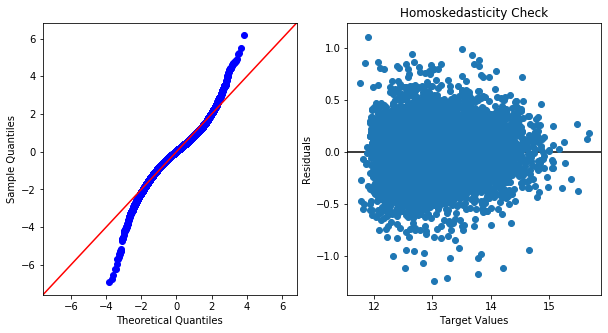

In [397]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
display(model.summary())

fig,ax = plt.subplots(ncols=2,figsize=(10,5))
fig = sm.graphics.qqplot(model.resid, stats.distributions.norm, fit=True, line='45', ax=ax[0])
ax[1].scatter(x=model.predict(), y=model.resid)
ax[1].axhline(0,color='k',zorder=-1)
ax[1].set(ylabel='Residuals',title='Homoskedasticity Check', xlabel="Target Values")

>**Observations:**
* For Model 4, we once again removed P-Values over .05 
* The 4th Model yielded an R squared of .884
* The Skew level of -.196 shows that the data is pretty symmetrical 
* The Kurtosis level of 5..906 is greater than 3 which is a  leptokurtic distribution. This type of distribution has longer and fatter tails. This went down slightly compared to our 3rd model. 

## Multicollinearity Check

In [399]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#this is the original data and not the data that has been processed through multiple models 
X = x_cols
X = sm.add_constant(train)
X

,const,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0_75,bathrooms_1_0,bathrooms_1_25,bathrooms_1_5,bathrooms_1_75,bathrooms_2_0,bathrooms_2_25,bathrooms_2_5,bathrooms_2_75,bathrooms_3_0,bathrooms_3_25,bathrooms_3_5,bathrooms_3_75,bathrooms_4_0,bathrooms_4_25,bathrooms_4_5,bathrooms_4_75,bathrooms_5_0,bathrooms_5_25,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_6_5,bathrooms_6_75,bathrooms_7_5,bathrooms_7_75,bathrooms_8_0,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,waterfront_1_0,view_1,condition_2,condition_3,condition_4,condition_5,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,sqft_basement_1,yr_renovated_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
12906,1.0,12.966878,7.365180,13.136341,7.365180,7.620705,12.256737,3.555348,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
849,1.0,12.445090,7.635304,9.104980,7.279319,7.396335,8.972717,3.931826,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8301,1.0,12.666657,7.677864,8.993303,7.677864,7.820038,9.104424,3.465736,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8813,1.0,12.785491,6.768493,8.433812,6.768493,6.835185,8.433812,4.356709,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18492,1.0,13.208541,7.383989,8.995785,6.993933,7.319865,9.082848,4.174387,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [316]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_results = pd.Series(dict(zip(X.columns, vif)))
vif_results

[('const', 9628.133534498193),
 ('price', 8.740119159324696),
 ('sqft_living', 19.875284598946767),
 ('sqft_lot', 7.537656833473653),
 ('sqft_above', 19.5534706328852),
 ('sqft_living15', 3.3521662613469596),
 ('sqft_lot15', 7.1050519950644055),
 ('Age', 3.4363164167013225),
 ('bedrooms_10', 1.1177875789621934),
 ('bedrooms_11', nan),
 ('bedrooms_2', 14.388233047305427),
 ('bedrooms_3', 32.88475325082404),
 ('bedrooms_33', 1.0108465542012486),
 ('bedrooms_4', 30.530117748545948),
 ('bedrooms_5', 10.669882572386356),
 ('bedrooms_6', 2.8712698772210428),
 ('bedrooms_7', 1.3087594880077038),
 ('bedrooms_8', 1.1423818967231325),
 ('bedrooms_9', 1.293299677488534),
 ('bathrooms_0_75', 15.117822325465898),
 ('bathrooms_1_0', 639.9374016453867),
 ('bathrooms_1_25', 2.766680764598651),
 ('bathrooms_1_5', 270.3057671945413),
 ('bathrooms_1_75', 525.9436871941574),
 ('bathrooms_2_0', 346.17137303558104),
 ('bathrooms_2_25', 375.9621844965019),
 ('bathrooms_2_5', 822.2752538666483),
 ('bathrooms_

In [ ]:
#remove vif over threshold of 6

# threshold = 6
# bad_vif = list(vif_results[vif_results>threshold].index)
# if 'const' in bad_vif:
#     bad_vif.remove('const') 
# bad_vif

In [ ]:
#refit model, QQ plot ,check for normaility, multicollinearity assumption check,

# predictors = '+'.join(x_cols)
# formula = outcome + '~' + predictors
# model = ols(formula=formula, data=train).fit()
# display(model.summary())

# fig,ax = plt.subplots(ncols=2,figsize=(10,5))
# fig = sm.graphics.qqplot(model.resid, stats.distributions.norm, fit=True, line='45', ax=ax[0])
# ax[1].scatter(x=model.predict(), y=model.resid)
# ax[1].axhline(0,color='k',zorder=-1)
# ax[1].set(ylabel='Residuals',title='Homoskedasticity Check', xlabel="Target Values")

In [ ]:
#model validation 



In [ ]:
#intrepretations  

In [ ]:
#conclusions 